#**Cuaderno de trabajo para Ciencia de Datos BI0529/843 2025-1**

### **Profesor:**

Javier Correa Álvarez, MSc, PhD.


### **Por:**

* Sara Oquendo Correa *(ssoquendoc@eafit.edu.co)*


* Iván Gómez Pimentel *(idgomezp@eafit.edu.co)*

#**Entrega 1**

***📆 11/03/25***

## **Documentos usados para trabajar:**


1. Proteoma del banano (*Musa acuminata*) descargado de phytozome
2. Proteoma del maíz (*Zea mays*) descargado de phytozome (B73 reference genome)
3. Genes del maíz (Jia et al., 2023)



---




📄 Artículo guía:

Jia, L., Hu, D., Wang, J., Liang, Y., Li, F., Wang, Y., & Han, Y. (2023). Genome-Wide Identification and Functional Analysis of Nitrate Transporter Genes (NPF, NRT2 and NRT3) in Maize. International Journal Of Molecular Sciences, 24(16), 12941. https://doi.org/10.3390/ijms241612941

Link: https://www.mdpi.com/1422-0067/24/16/12941


## **Instalación de paquetes:** ✅

- **Miniconda en MacOS:** ✅

Para instalar miniconda3 se siguieron los pasos de la página web: https://docs.conda.io/projects/conda/en/stable/user-guide/install/macos.html

y se utilizó el siguiente comando en la terminal:


In [ ]:
bash Miniconda3-latest-MacOSX-arm64.sh

Después de la instalación aseguramos que si se encuentre instalado:

In [ ]:
conda env list

* **Seqtk en conda:** ✅

https://anaconda.org/bioconda/seqtk

Después de instalar conda usamos estos comandos:

In [ ]:
conda config --add channels defaults
conda config --add channels bioconda
conda config --add channels conda-forge
conda config --set channel_priority strict

In [ ]:
conda config --show channels

In [ ]:
#Creamos un nuevo ambiente en conda
conda create --name bioinfo -y

conda activate bioinfo

#Para confirmar que si se haya descargado el ambiente correctamente
conda env list

In [ ]:
#En el ambiente descargamos
conda install bioconda::seqtk

#Para confirmar que si se haya descargado escribimos
seqtk



* **Homebrew en MacOS:** ✅

https://docs.brew.sh/Installation




In [ ]:
/bin/bash -c "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/HEAD/install.sh)"

#Luego se copian los comandos necesarios que da la respuesta a la instalación y listo (termina con brew help).

* **BLAST en brew:** ✅

https://formulae.brew.sh/formula/blast

In [ ]:
brew install blast

* **Mafft en brew:** ✅

https://formulae.brew.sh/formula/mafft



In [ ]:
brew install mafft

In [ ]:
mafft

* **trimAL en conda:** ✅

https://anaconda.org/bioconda/trimal

https://trimal.readthedocs.io/en/latest/usage.html

In [ ]:
conda install bioconda::trimal

* **Iqtree2 en conda:** ✅

https://anaconda.org/bioconda/iqtree

In [ ]:
conda install bioconda::iqtree

## **Parte 1:** ✅

1. Tomamos los 87 genes del maíz transportadores de nitrato (NRTs) del material suplementario del artículo. Es importante resaltar que realmente **son 167 genes** pues algunos de los 87 genes tienen varias 'versiones'.

2. Luego de tener los IDs de estos genes procedemos a extraelos con sus secuencias y 'versiones' del proteoma del maíz.

In [ ]:
seqtk subseq PROTEOMA-MAIZE.fasta IDS_87_NRTs_GENES_MAIZE > 167_MAIZE_GENES.fasta (ya llamado 167_MAIZE_GENES, pero es para ejercicio)

In [ ]:
#Para verificar que si se hayan extraído completamente las visualizamos y las contamos
head -n 10 167_MAIZE_GENES.fasta

In [ ]:
grep -c ">" 167_MAIZE_GENES.fasta

## **Parte 2:** ✅

3. Hacemos el BLASTp con los 167 genes del maíz vs. el proteoma del banano con el fin de identificar cuantos genes hómologos a los del maíz hay en el banano.


4. Hacemos el filtrado de datos usando sort y awk para rescatar los códigos de las proteinas con la homología significativa.

4. Usamos seqtk para rescatar las secuencias de interés en el banano para agruparlas en un único archivo multifasta.

**3. BLASTp 167 genes del maíz vs. proteoma del banano** ⚠️

In [ ]:
#Base de datos BLASTp
makeblastdb -in PROTEOME-BANANA.fasta -dbtype prot -out proteoma_banana_db

In [ ]:
#Hacer BLASTp
blastp -query genes_maize_extraidos.fasta -db proteoma_banana_db -out resultados_blastp.txt -outfmt 6 -evalue 1e-4 -num_threads 4

**4. Filtrado con sort y awk** ⚠️



In [ ]:
sort -k2,1 -k11g blast_result_with_headers.txt | awk '!a[$1]++'

In [ ]:
sort -k2,1 -k11g blast_result_with_headers.txt | awk '!a[$1]++' | wc -l #word count
#Resultamos con 165 de 167 genes del maíz.

In [ ]:
#Descargamos el documento
sort -k2,1 -k11g blast_result_with_headers.txt | awk '!a[$1]++' > out.maizevsbanano.bastp.filtrado.tx

In [ ]:
#Si queremos filtrar solo los IDs del banano(columna 2)
awk '{print $2}' out.maizevsbanano.bastp.filtrado.txt

#Guardamos solo los IDs del banano.
awk '{print $2}' out.maizevsbanano.bastp.filtrado.txt > ids_banana_NTG.txt

**5. Seqtk para recuperar secuencias del banano** ✅

In [ ]:
mv PROTEOME-BANANA.txt PROTEOME-BANANA.fasta

In [ ]:
seqtk subseq PROTEOME-BANANA.fasta ids_banana_NTG.txt > secuencias_banana_NTG.fasta

In [ ]:
#Para verificar que si se hayan extraído completamente las visualizamos y las contamos
head -n 20 secuencias_banana_NTG.fasta

grep -c ">" secuencias_banana_NTG.fasta #Debe resultar 164, el mismo número de ids extraídos del BLASTp

## **Parte 3:** ✅

✏️ Notas:

Major facilitator superfamily (MFS) transporter facilitates the transport across cytoplasmic or internal membranes of one or more from a variety of substrates including ions, sugar phosphates, drugs, neurotransmitters, nucleosides, amino acids, and peptides

NRT1/PTR (nitrate transporter/peptide transporter) family major facilitator superfamily (MFS) transporter is a proton-coupled transporter that facilitates the transport of one or more from a wide variety of substrates including nitrate, peptides, amino acids, dicarboxylates, glucosinolates, as well as the plant hormones indole-3-acetic acid (IAA) and abscisic acid (ABA)

📄 Bibliografía: https://www.sciencedirect.com/science/article/pii/S1674205219302345#:~:text=According%20to%20the%20membrane%20transporter,22%20families%20(Table%202).



**6. Batch web CD search tool para la identificación de los dominios del banano** ✅

Usamos Batch web CD search tool (https://www.ncbi.nlm.nih.gov/Structure/bwrpsb/bwrpsb.cgi) para identificar los dominios de las proteínas del banano que salieron homólogas a las del maíz. Obtenemos un archivo .txt y pasamos la tabla a Excel para que sea mas fácil eliminar las proteínas que estan incompletas (sale como C en la columna de incomplete), las que no tengan el dominio cl28910 o que no sean parte de la superfamilia MFS donde están las proteínas NPF (nitrate protein transporter) que nos interesa.

...Luego, eliminamos los IDs redundantes en Excel.

...Quedamos con 31 IDs y los convertimos en un archivo .txt para poder hacer el seqtk.

**7. Seqtk IDs dominios de banana vs. proteoma banana**

Con las secuencias de dominios de banana restantes del archivo Excel realizamos un seqtk para completar la secuencia de esos IDs en el proteoma del banano. ✅

In [ ]:
seqtk subseq PROTEOME-BANANA.fasta dominios_banana.txt > dominios_secuencias_banana.fasta

In [ ]:
#Para verificar que si se hayan extraído completamente las visualizamos y las contamos
head -n 10 dominios_secuencias_banana.fasta

In [ ]:
grep -c ">"  dominios_secuencias_banana.fasta #Debe resultar 31, el mismo número de ids extraídos

## **Parte 4:** ✅

Crear un nuevo ambiente de conda en sus secciones de Apolo llamado Phylo e instalar los siguientes paquetes: mafft y iqtree2

In [ ]:
conda create --name Phylo -y
conda activate Phylo

**8. Mafft:** ✅


Mafft con el documento de las 31 secuencias de banano

In [ ]:
mafft --localpair --reorder --clustalout --thread 4 --maxiterate 1000 dominios_secuencias_banana.fasta > mafft_banana.clustal

Después hicimos una confirmacion en cd batch tool otra vez. Viendo el alineamiento resultado escogimos una region conservada de una de las proteínas de la lista para confirmar que si corriespondiera esa region a la superfamilia  que nos interesa que es la de los NTG. 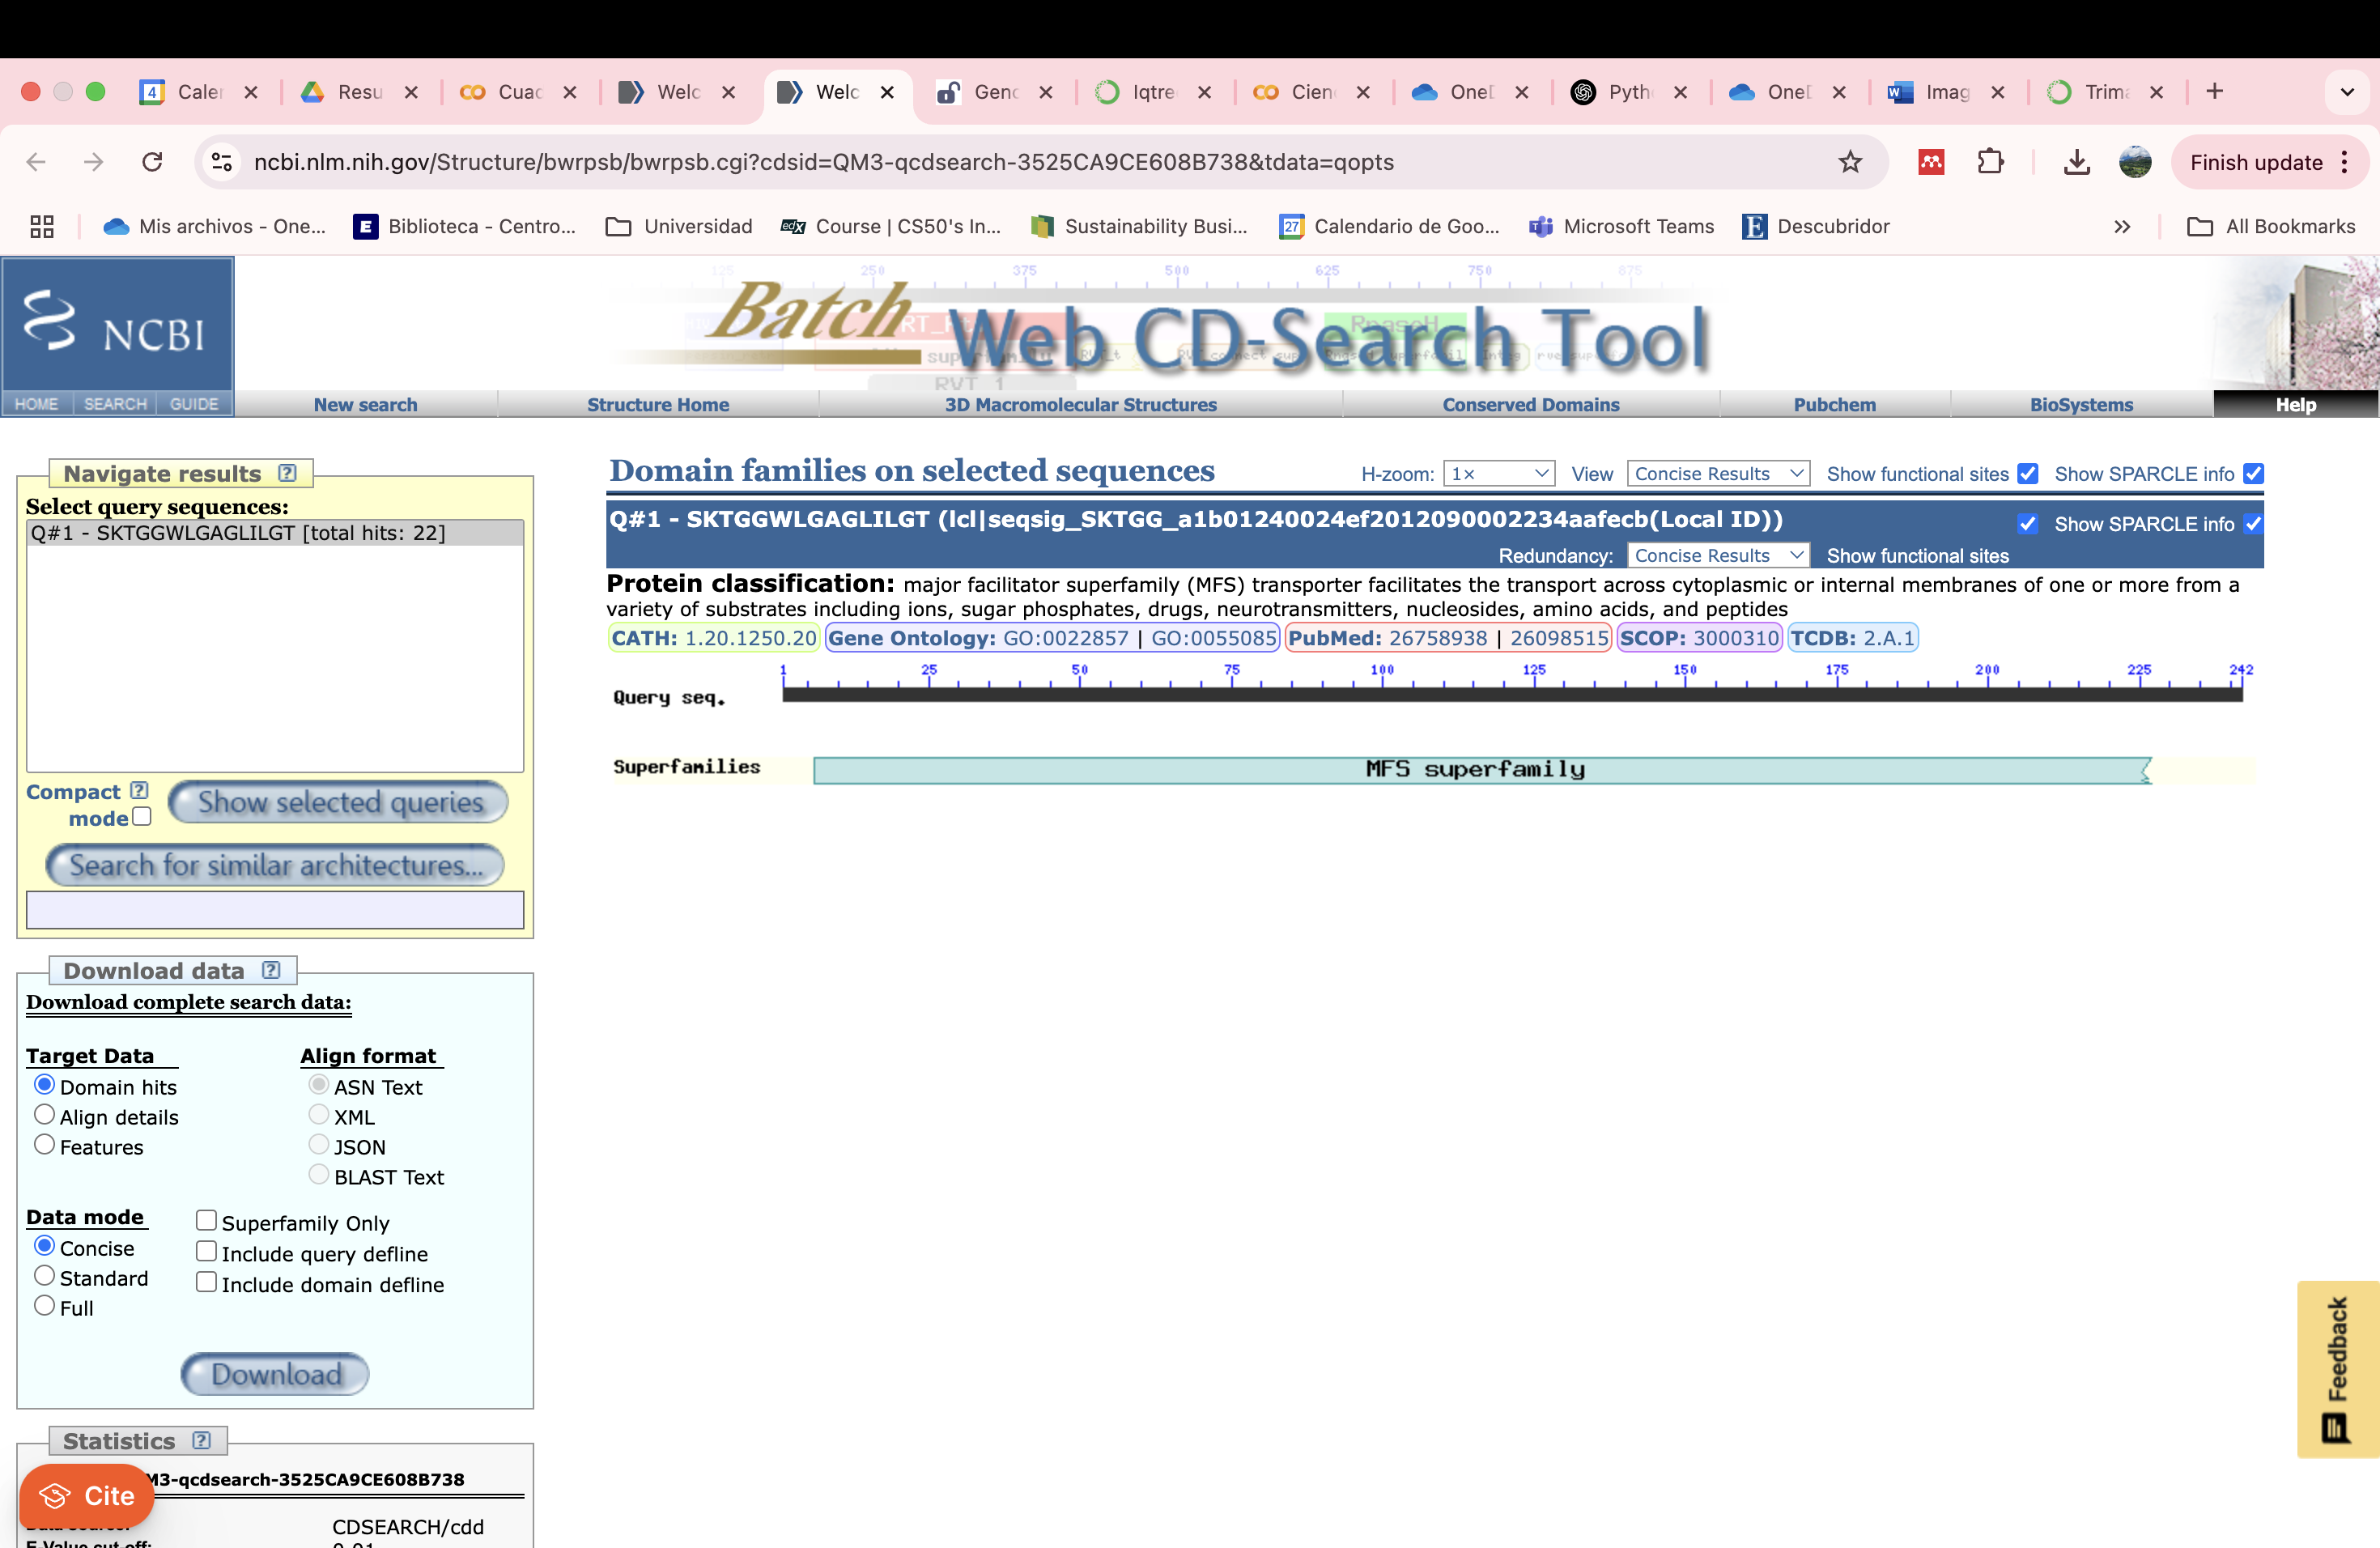

**8.2.** Realizamos el Mafft nuevamente pero añadiendo a las secuencias del banano, representantes de la superfamilia MFS que tomamos del artículo guía. Las proteínas fueron: NRT2, NRT3, NPF1, NPF2, NPF3, NPF4, NPF5, NPF6, NPF7 y NPF8 de *Arabidopsis thaliana*. (Todas las secuencias de las proteínas fueron extraídas de NCBI)

Las secuencias de las proteínas las añadimos manualmente al documento dominios_secuencias_banana.fasta.

In [ ]:
mafft --localpair --reorder --clustalout --thread 4 --maxiterate 1000 banana-arabidopsisOF.fasta > mafft_banana-atali.clustal

In [ ]:
head -n 10 mafft_banana-atali.clustal

**9. trimAL:** ✅

In [ ]:
trimal -in mafft_banana.clustal -out trimalv2.trimal -strictplus

**9.2.** Se realizó el trimAl nuevamente con las secuencias ya conjuntas de los dominios del banano y las proteínas de la superfamilia MFS.

In [ ]:
trimal -in mafft_banana-atali.clustal -out trimal-atali.trimal -strictplus

**10. Iqtree2:** ✅

In [ ]:
iqtree2 -h

In [ ]:
iqtree2 -s trimalv3.trimal --alrt 1000 -B 1000 -T 2

**10.2.** Se realizó Iqtree nuevamente con las secuencias ya conjuntas de los dominios del banano y las proteínas de la superfamilia MFS.

In [ ]:
iqtree2 -s trimal-atali.trimal --alrt 1000 -B 1000 -T 2

**11. iTOL**

El archivo .contree resultado de Iqtree fue abierto en iTOL.

https://itol.embl.de/



Secuencias del banano:

- GSMUAxxx

Subfamilias de proteínas de la super familia MFS:

- AtNPFxx

- AtNRTxx

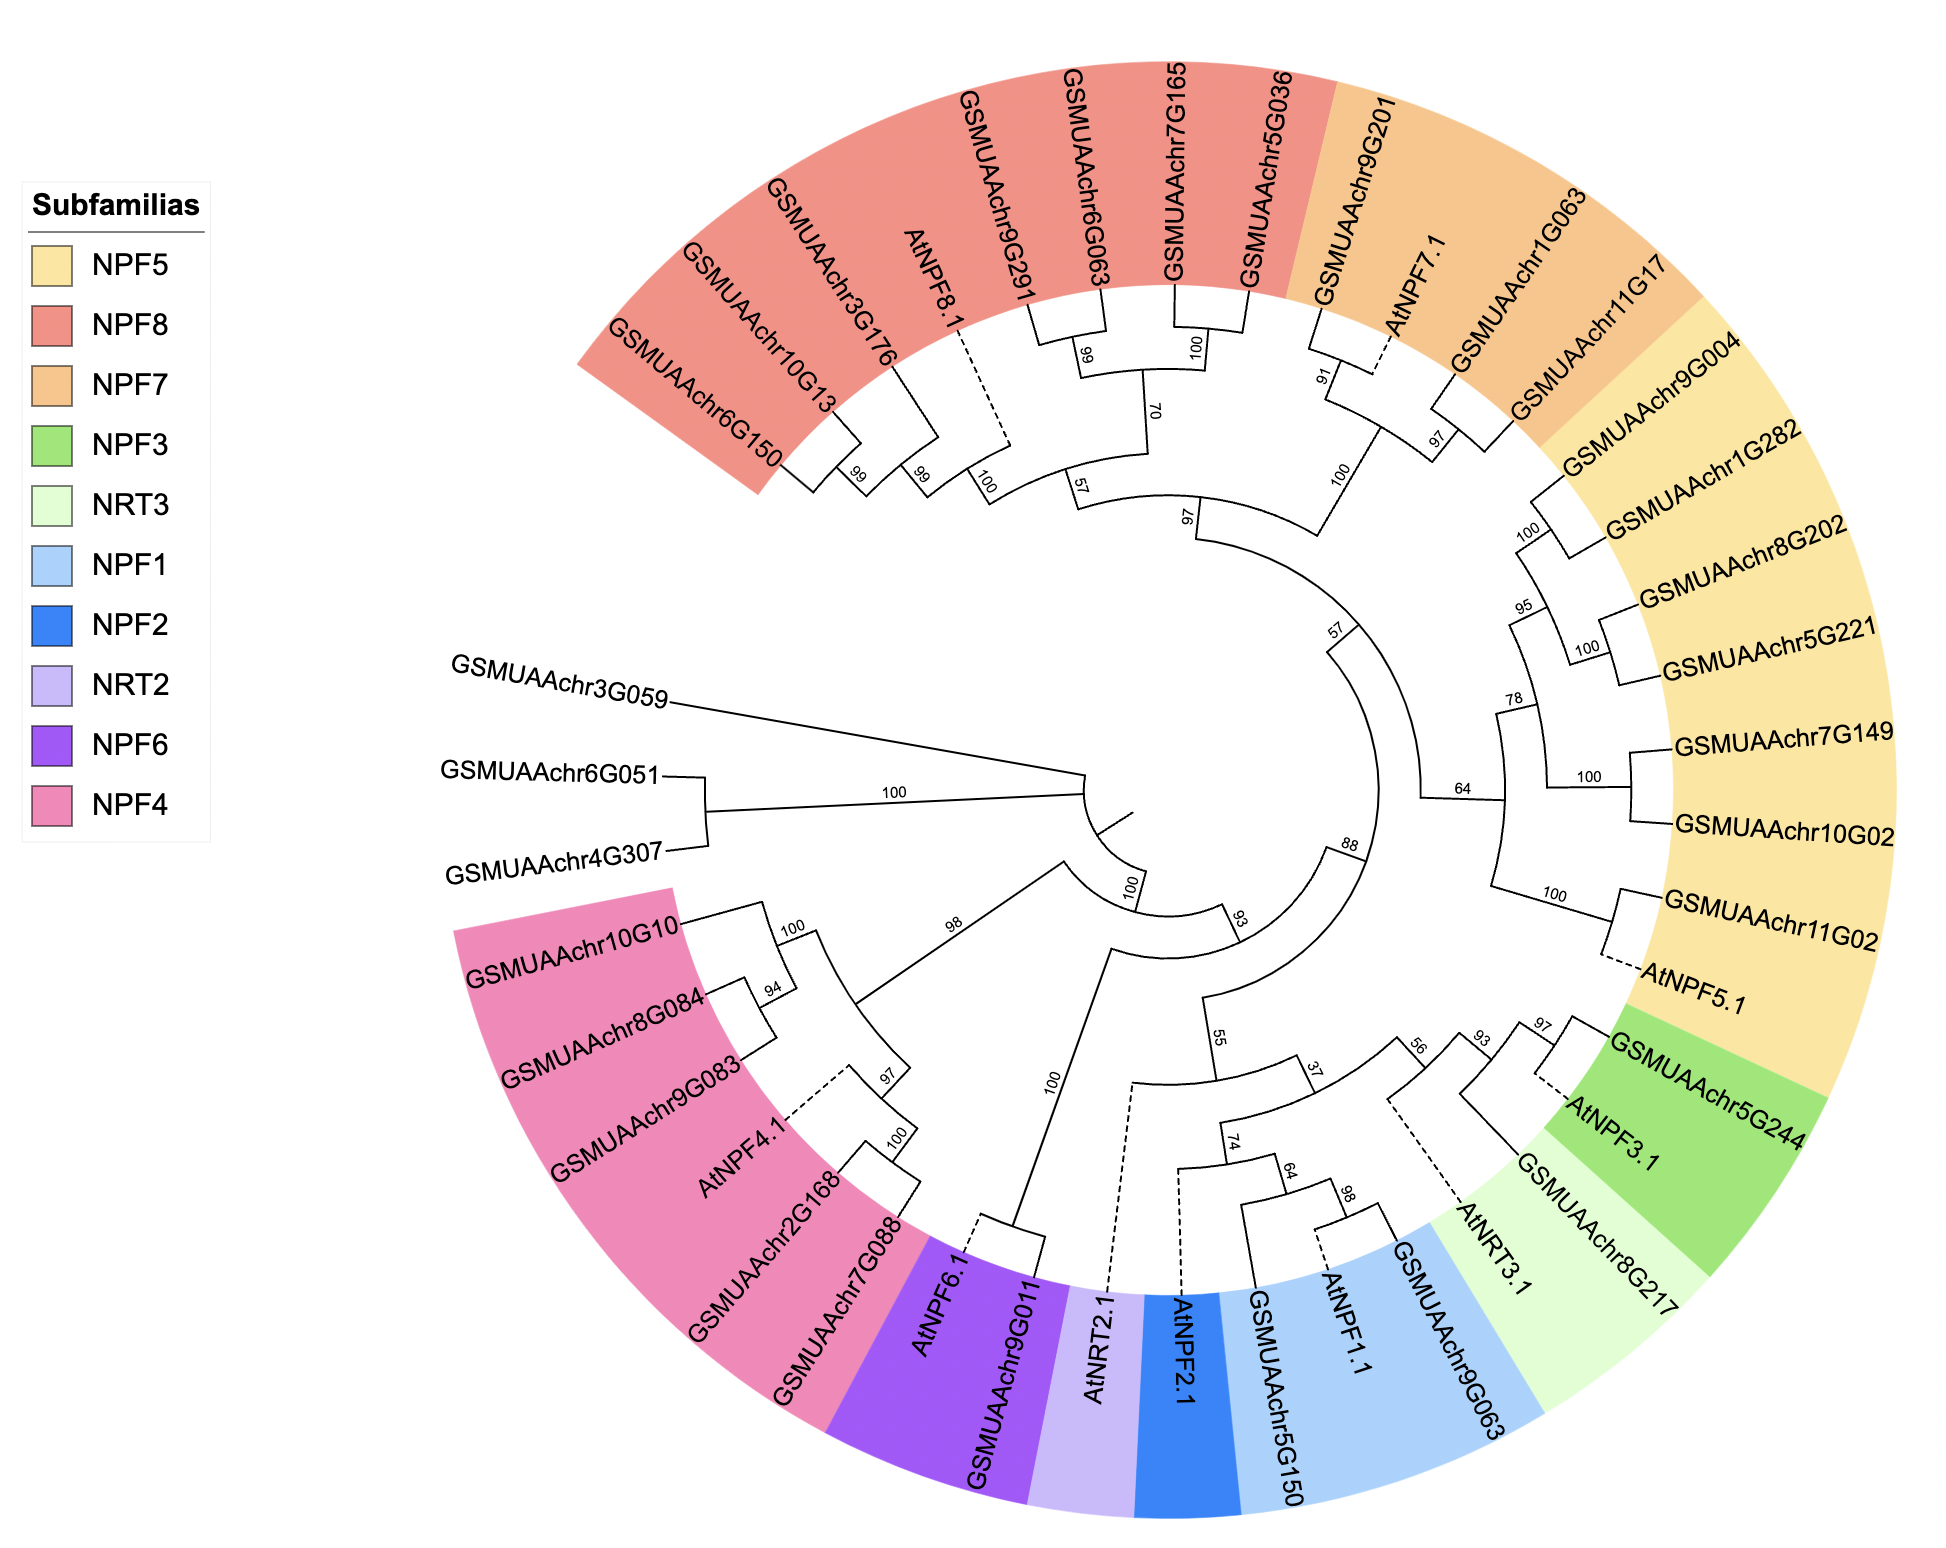